<a href="https://colab.research.google.com/github/HarshJain41/Cognizant_Internship/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [31]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [32]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [33]:
path = "/content/drive/MyDrive/Forage_Internship/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [34]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [36]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [37]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

There are no null values in our data.

In [38]:
for i in df.columns:
  print(i, df[i].nunique())

transaction_id 7829
timestamp 7738
product_id 300
category 22
customer_type 5
unit_price 64
quantity 4
total 256
payment_type 4


In [68]:
# Extracting Date,Year,Month,Day
df.timestamp = pd.to_datetime(df.timestamp)


In [69]:
df['day'] = df.timestamp.dt.day_name() # Thanks @Mark Wang
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month

In [70]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,day,year,month
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,Wednesday,2022,3
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,Sunday,2022,3
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,Friday,2022,3
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,Wednesday,2022,3
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,Saturday,2022,3











































---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [39]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [41]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

### **1st Visualisation**

In [42]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [43]:
df['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

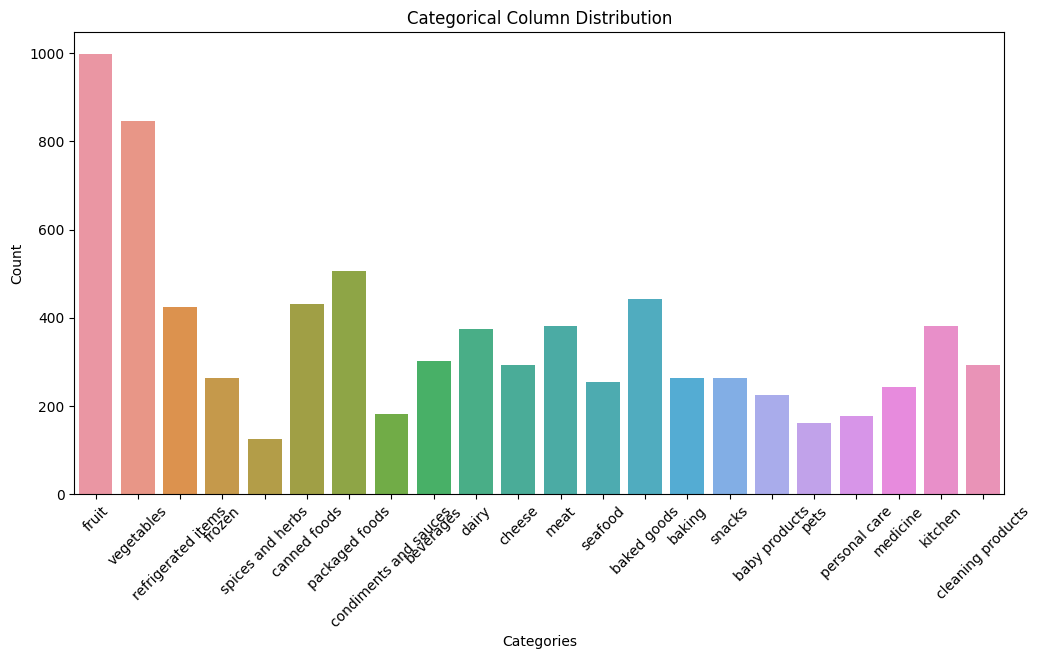

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'df' with the categorical column 'category_column'

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(data=df, x='category')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Set the plot title and labels
plt.title('Categorical Column Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')

# Display the plot
plt.show()


* "Fruit" and "vegetables" are the most frequent categories, indicating their popularity.
* Processed and canned foods are also commonly purchased.
* Refrigerated items, kitchen supplies, meat, and dairy have similar counts, suggesting their relevance to cooking and meal preparation.
* "Beverages" and "cheese" are popular choices.
* Cleaning products, baking items, snacks, and frozen foods have moderate counts.
* Categories like seafood, medicine, baby products, condiments and sauces, personal care, pets, and spices and herbs have lower counts, indicating they are less commonly purchased or niche product groups.

### **2nd Visualisation**

In [45]:
df['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

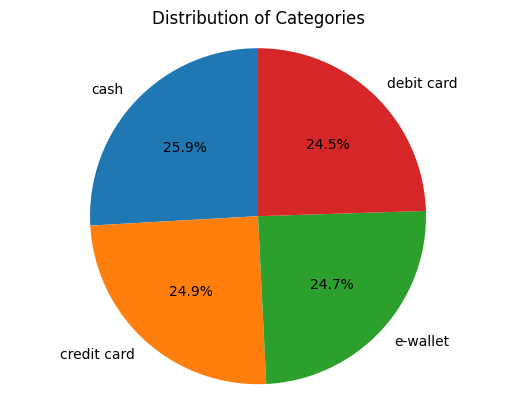

In [46]:
# Calculate the count or frequency of each category
category_counts = df['payment_type'].value_counts()

# Extract the category labels and their respective counts
categories = category_counts.index.tolist()
counts = category_counts.tolist()

# Create a pie chart
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Set the chart title
plt.title('Distribution of Categories')

# Display the chart
plt.show()

There is almost equal transactions done by all kind of payment methods.

### **3rd Visualisation**

In [47]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [48]:
df['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

<Axes: xlabel='customer_type', ylabel='count'>

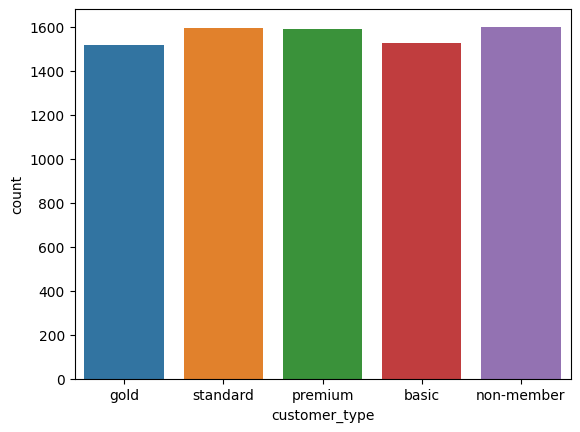

In [49]:
sns.countplot(data=df, x = 'customer_type')

The number of customers across all type of membership is the same here.

### **4th Visualisation**

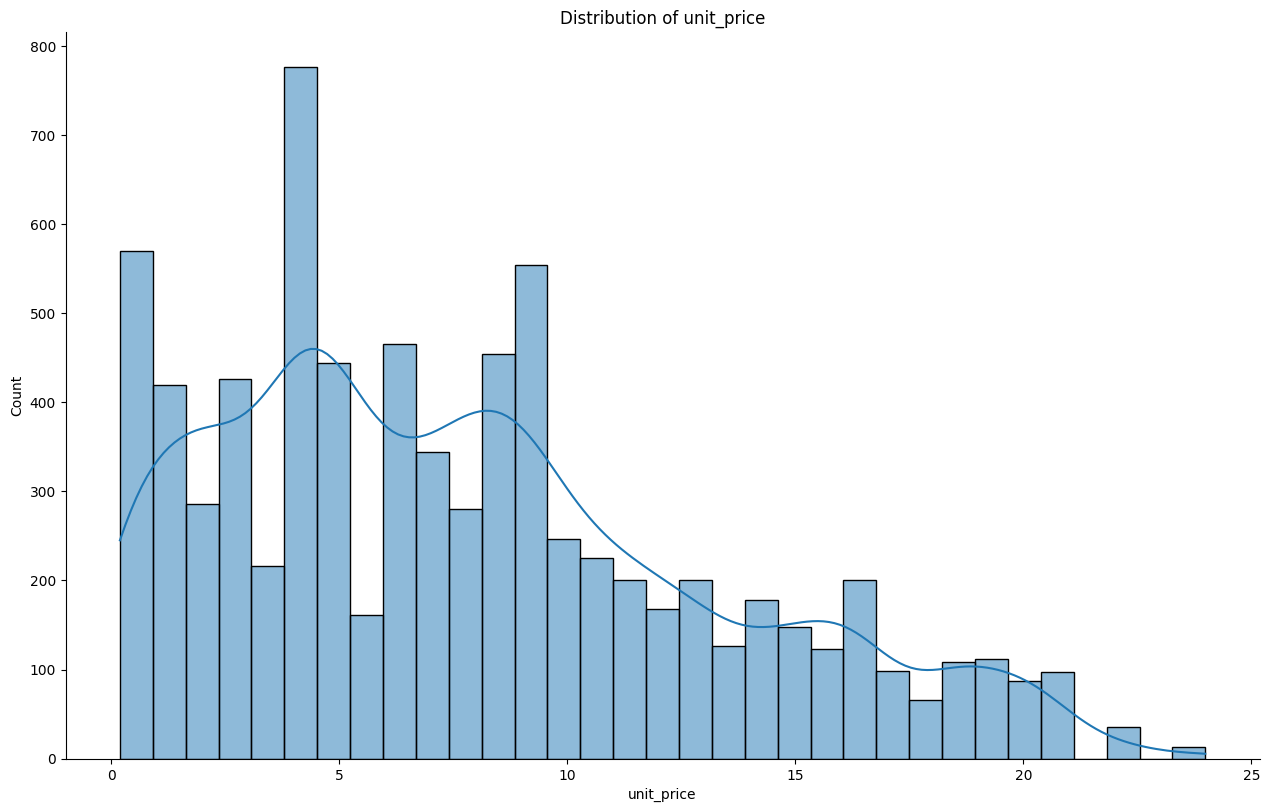

In [50]:
plot_continuous_distribution(df, 'unit_price')

The plot of the continuous unit price distribution appears to be skewed to the right, i.e. more data points are clustered to the left and the right end is longer. This means that cheaper items sell more than the expensive items.

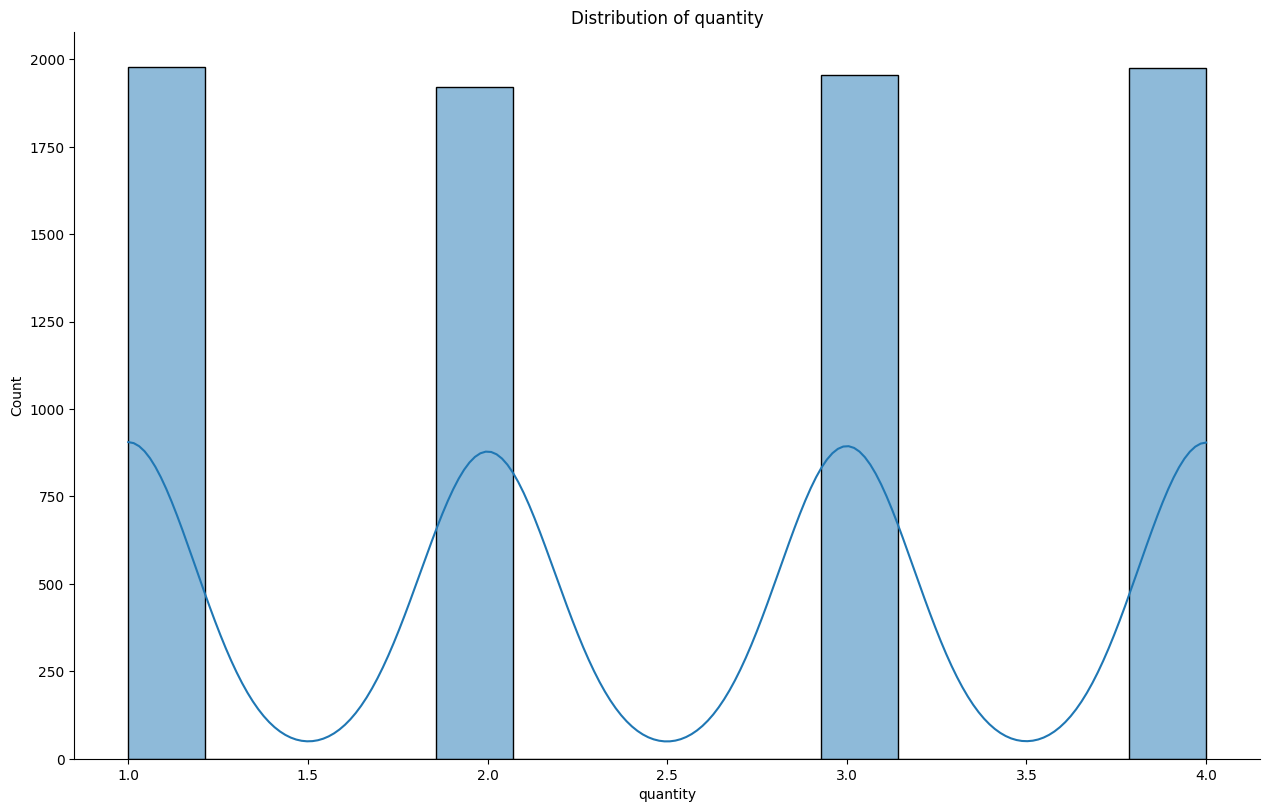

In [51]:
plot_continuous_distribution(df, 'quantity')

Distribution is same across all the products

### **5th Visualisation**

In [52]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


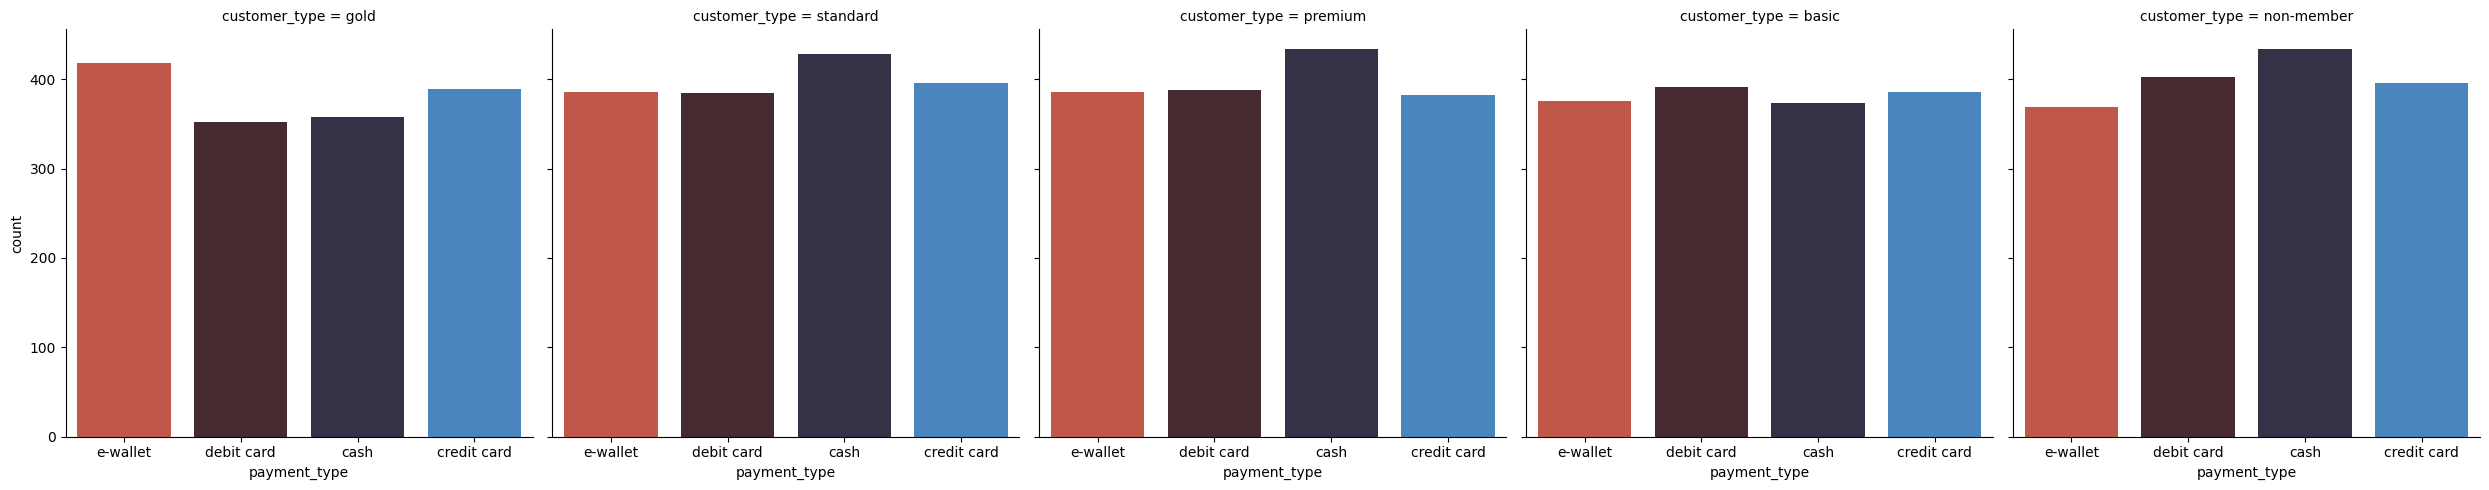

In [53]:
room_type_pref = sns.catplot(data=df,x='payment_type',kind='count',col='customer_type', palette='icefire_r')

Premium Customers: Prefer Cash followed by debit card

Gold Customers: Prefer e-waller followed by credit card

Standard Customers: Prefer cash followed by credit card

Basic Customers: Prefer debit card

Non-Member: Prefer cash or debit_card

### **6th Visualisation**

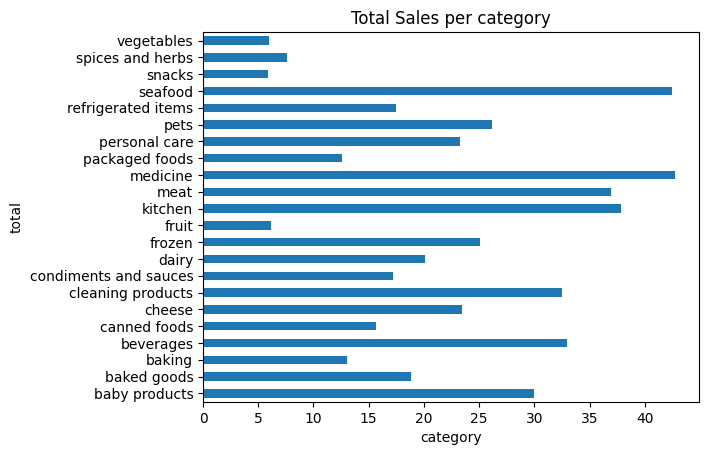

In [54]:
df.groupby('category')['total'].mean().plot(kind='barh')

# Add title and labels
plt.title('Total Sales per category')
plt.xlabel('category')
plt.ylabel('total')

# Display the plot
plt.show()

### **7th Visualisation**

In [55]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [58]:
new = df.groupby('category')['total'].sum().sort_values(ascending=False).reset_index()
new

,category,total
0,kitchen,14456.65
1,meat,14102.31
2,seafood,10754.81
3,medicine,10393.78
4,beverages,9930.64
5,cleaning products,9483.75
6,baked goods,8348.21
7,dairy,7551.60
8,refrigerated items,7436.45
9,cheese,6861.27


In [64]:
categ_list = []
for i in new['category']:
  categ_list.append(i)

categ_total = []
for i in new['total']:
  categ_total.append(i)

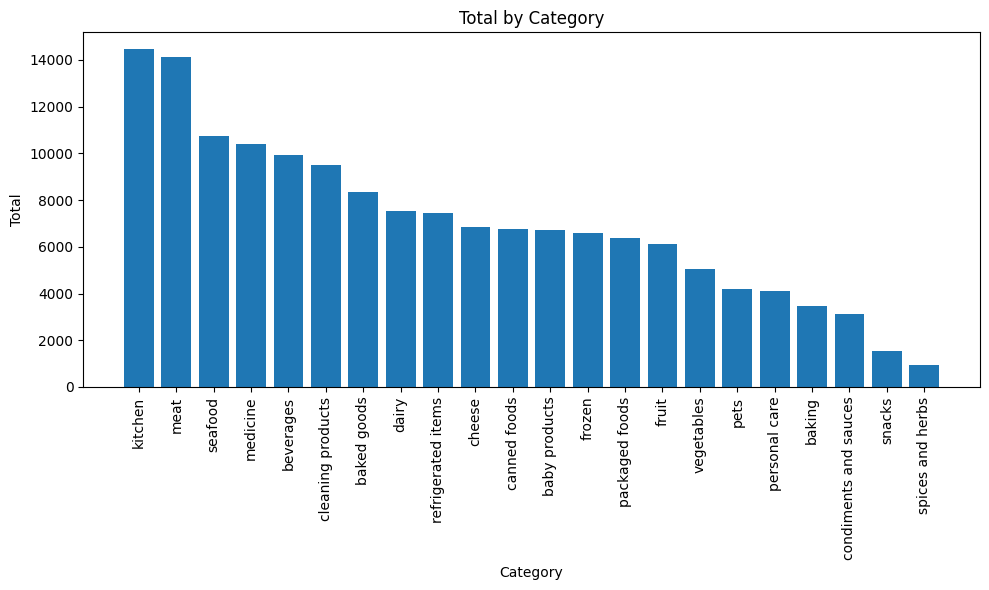

In [65]:

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categ_list, categ_total)

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Total')
plt.title('Total by Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


Kitchen, and meat related items has the most sales.

Seafood, medicine, beverages, cleaning products... etc has almost same average sales

### **8th Visualisation**

<Axes: xlabel='day', ylabel='total'>

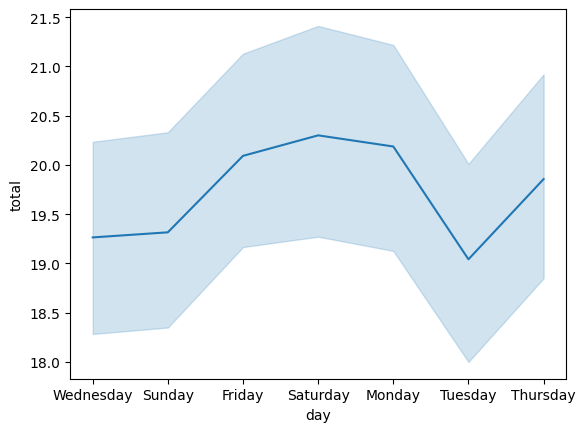

In [71]:
sns.lineplot(x= df.day,
             y = df.total)

Friday and Saturday has the most sales.

There is less sales on monday, one reason could be that people might go on vacations on those days.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.


## Conclusion

1. "Fruit" and "vegetables" are the most frequent categories, indicating their popularity.

2. We can increase the kitchen, meat, seafood inventories to attract customers as these majorly contribute to the revenue because of their high selling price.

3. The highest sales occur on Saturdays, Thursdays, and Fridays, as these days are typically non-working days when people have more time for shopping. Sundays are often considered leisure days when individuals might go on vacations, short trips, or leave town. To capitalize on this trend and further boost sales, promotional advertisements can be strategically targeted towards Sundays to potentially double the sales.

4. The customers prefer cash, credit or debit card as a payment method.

5. Promotional offers could be given to the customers at the time when the sales are low.

6. Fresh items like fruits and vegetables are daily essentials, so they are highly purchased by the customers. So, the store have to keep the fresh material in order to generate credibility amongst the customers.

7. Proper feedback can be taken by customers themselves in order to improve the sales and generate more revenue.

8. Customer tend to purchase cheaper products and items more frequently, so we can add schemes like buy 1 big item and get 2 free cheaper items. this is a kind of marketing strategies which can work efficiently at times, as people crave for more free items.

9. By analyzing customer preferences using the available data, Gala Store can effectively align its product selection and marketing strategies with what customers prefer. This alignment helps to enhance customer satisfaction and encourages customers to return to the store for future purchases. This knowledge empowers Gala Store to make informed decisions that cater to customer preferences, ultimately resulting in improved customer satisfaction and increased customer loyalty.